<div align="center">
  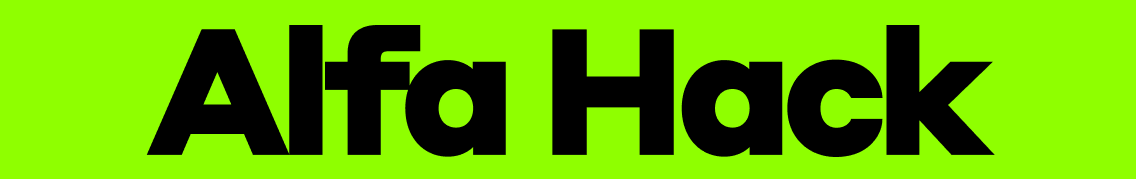
</div>

## Этап 1. Установка библиотек и импорт данных

In [1]:
!pip install pandas numpy scikit-learn

In [2]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
import glob
import os

In [3]:


folder_path_1 = ###
folder_path_2 = ###

dataframes_1 = []
dataframes_2 = []

for file in os.listdir(folder_path_1):
    if file.endswith(".csv"):
        file_path = os.path.join(folder_path_1, file)
        df = pd.read_csv(file_path)
        dataframes_1.append(df)

data_test = pd.concat(dataframes_1, ignore_index=True)

for file in os.listdir(folder_path_2):
    if file.endswith(".csv"):
        file_path = os.path.join(folder_path_2, file)
        df = pd.read_csv(file_path)
        dataframes_2.append(df)

data_train = pd.concat(dataframes_2, ignore_index=True)



Объединим тренировочные и тестовые данные в единые датасеты train и test

In [4]:

display('Размерность полных тренировочных данных составляет: {} строки и {} столбцов'.format(*data_train.shape))

display(data_train.head())

data_train['smpl'].value_counts(dropna=False)

'Размерность полных тренировочных данных составляет: 413194 строки и 189 столбцов'

,target,smpl,id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186
0,0,train,371871,0.580275,-0.317576,-0.920603,0.157002,0.407557,1.961104,2.0,...,1.097288,-1.484394,9.0,-1.457750,1.525638,0.966118,1.620856,0.537335,2.0,1.811422
1,0,train,371872,0.804114,-0.163591,-0.178650,0.262891,1.079495,2.147221,31.0,...,0.993478,-0.275404,9.0,-0.286328,1.582347,1.443515,1.352200,3.133803,13.0,1.228907
2,0,train,371873,0.337195,-0.172360,0.454759,-1.638610,0.459024,1.218978,2.0,...,1.287848,0.290076,9.0,0.196219,-0.744378,-0.202211,0.764208,1.462761,2.0,0.658484
3,0,train,371874,0.040928,1.475070,-0.306589,0.387663,2.288606,-0.995705,4.0,...,-0.206561,-1.393263,9.0,0.937511,0.522292,-1.381347,1.543905,0.005867,60.0,0.252006
4,0,train,371875,0.363331,-0.587768,1.639189,0.252861,2.062367,1.192560,23.0,...,0.372340,-0.290923,9.0,-0.001521,0.258174,1.455831,0.586191,1.146770,30.0,0.762081


smpl
train    413194
Name: count, dtype: int64

In [5]:


display('Размерность полных тренировочных данных составляет: {} строк и {} столбцов'.format(*data_test.shape))

display(data_test.head())

data_test['smpl'].value_counts(dropna=False)

'Размерность полных тренировочных данных составляет: 171919 строк и 188 столбцов'

,smpl,id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186
0,test,464767,0.276011,0.816942,0.468563,-0.625215,0.337518,-1.310119,2.0,0.407172,...,1.585895,0.748437,9.0,0.905933,0.758173,1.525394,0.145372,0.237401,2.0,0.297354
1,test,464768,0.806518,0.174450,-0.313156,1.838548,0.804932,0.487959,4.0,0.593912,...,0.600173,0.226149,9.0,-0.101444,0.387583,-1.989383,-0.701173,-0.295612,4.0,-1.270705
2,test,464769,0.106784,1.834093,0.476869,-0.262665,-0.497119,-1.231109,2.0,0.539515,...,1.616264,0.241476,9.0,-1.698670,-1.500880,0.102623,0.526830,-2.717848,2.0,0.459658
3,test,464770,0.488993,0.729237,-0.386244,0.477037,-1.222376,-2.184074,2.0,-0.552598,...,-0.374501,-1.446620,9.0,-0.481561,-0.050699,-0.661219,-1.172527,1.102042,2.0,-0.513393
4,test,464771,0.110438,0.964503,-1.330232,-0.911838,-1.533515,1.060730,2.0,0.582960,...,0.795422,-0.331418,9.0,0.946699,-1.040447,-0.826625,0.430751,-0.319302,2.0,-0.374098


smpl
test    171919
Name: count, dtype: int64

## Этап 2. Работа с моделью

In [6]:

X = data_train.drop(['target', 'smpl'], axis=1)
y = data_train['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.3)

gbdt_clf = HistGradientBoostingClassifier(min_samples_leaf=1,
                                          max_depth=20,
                                          max_iter=125,
                                          random_state=42).fit(X_train, y_train)

y_pred = gbdt_clf.predict_proba(X_test)

y_pred = pd.Series(y_pred[:, 1])

print(f'Метрика roc-auc на валидационных данных имеет значение: {roc_auc_score(y_test, y_pred)}')

Метрика roc-auc на валидационных данных имеет значение: 0.8037397539103383


In [ ]:
!pip install catboost imbalanced-learn optuna


In [11]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.model_selection import train_test_split

from catboost import CatBoostClassifier
from catboost import Pool, cv

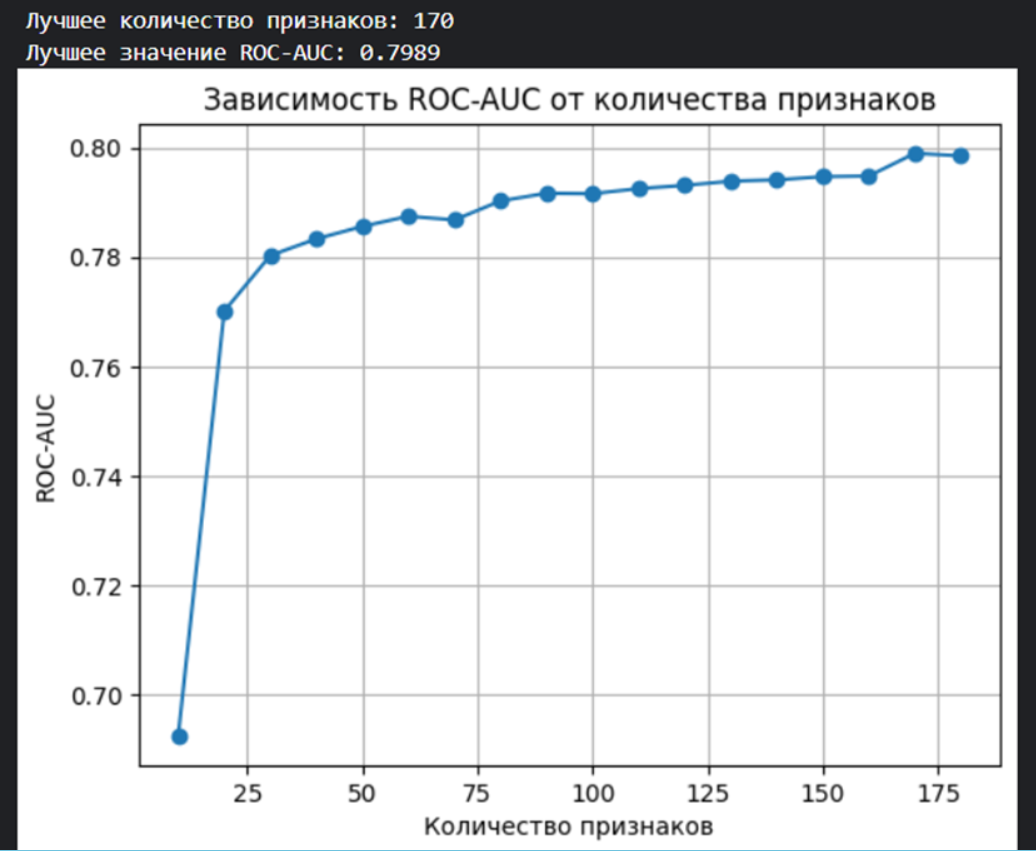


In [ ]:
from sklearn.inspection import permutation_importance

X = data_train.drop(['target', 'smpl'], axis=1)
y = data_train['target']

X_train_perm, X_test_perm, y_train_perm, y_test_perm = train_test_split(
    X, y, test_size=0.2, random_state=42
)

cat_perm = CatBoostClassifier(
    iterations=200,         
    depth=15,
    learning_rate=0.05,
    verbose=False,
    random_seed=42,
    task_type="GPU"
)

cat_perm.fit(X_train_perm, y_train_perm)

perm_importance = permutation_importance(
    cat_perm, 
    X_test_perm, 
    y_test_perm, 
    n_repeats=10, 
    random_state=42, 
)

importance_scores = perm_importance.importances_mean

top_features_idx = np.argsort(importance_scores)[-170:]  
top_features = X.columns[top_features_idx]                

used_features = list(top_features)


In [ ]:
import optuna
from catboost import Pool

X = data_train[top_features]
y = data_train['target']
pool = Pool(data=X, label=y)

def objective(trial):
    params = {
        'loss_function': 'CrossEntropy',
        'eval_metric': 'AUC',
        'task_type': 'GPU',
        'random_seed': 42,
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'depth': trial.suggest_int('depth', 4, 24),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1, 10),
        'bootstrap_type': 'Bernoulli',
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'grow_policy': 'Lossguide',
        'score_function': trial.suggest_categorical('score_function', ['NewtonL2', 'Newton']),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 10, 100),
        'max_leaves': trial.suggest_int('max_leaves', 10, 150),
    }
    
    cv_results = cv(
        params=params,
        pool=pool,
        fold_count=5,
        partition_random_seed=42,
        shuffle=True,
        stratified=True,
        verbose_eval=False,
        early_stopping_rounds=50
    )
    
    return max(cv_results['test-AUC-mean'])

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Лучшие параметры:", study.best_params)


In [ ]:

params = {
    'loss_function': 'CrossEntropy',
    'eval_metric': 'AUC',
    'task_type': 'GPU',
    'random_seed': 42,
    'learning_rate': 0.015,
    'depth': 20,
    'l2_leaf_reg': 6,
    'bootstrap_type': 'Bernoulli',
    'subsample': 0.8,
    'grow_policy': 'Lossguide',
    'score_function': 'NewtonL2',
    'min_data_in_leaf': 90,
    'max_leaves': 110,
}


pool = Pool(data=X, label=y)


cv_results = cv(
    params=params,
    pool=pool,
    fold_count=5,             
    partition_random_seed=42,  
    shuffle=True,              
    stratified=True,           
    verbose_eval=100,
    early_stopping_rounds=250,
    plot="True"
)





In [ ]:
cat = CatBoostClassifier(
    **params,  
    iterations=int(cv_results['iterations'].iloc[-1]),  # Устанавливаем оптимальное количество итераций
    verbose=False
)

cat.fit(X[top_features], y)




In [ ]:
print("Средний AUC по фолдам:", cv_results['test-AUC-mean'].iloc[-1])

In [53]:
cat = CatBoostClassifier(
    **params,  
    iterations=int(cv_results['iterations'].iloc[-1]),
    verbose=False
)


cat.fit(X, y)




In [ ]:
y_pred = cat.predict_proba(X_test)

y_pred = pd.Series(y_pred[:, 1])

print(f'Метрика roc-auc на валидационных данных имеет значение: {roc_auc_score(y_test, y_pred)}')

In [ ]:

y_test_pred = cat.predict_proba(data_test.drop(['smpl'], axis=1))

y_test_pred = pd.Series(y_test_pred[:, 1])

data_test['target'] = y_test_pred

data_test[['id', 'target']].to_csv('submission_case.csv', index=False)